In [1]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
import random

In [4]:
(xtrain,ytrain),(xtest,ytest)=keras.datasets.mnist.load_data()
(img_l,img_w)=xtrain[0].shape
print("Img = ",img_l," x ",img_w)

Img =  28  x  28


In [5]:
xtrain=xtrain/255
xtest=xtest/255

In [6]:
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [9]:
model.compile(optimizer="sgd",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
history=model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=11)

Epoch 1/11
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6417 - accuracy: 0.8404 - val_loss: 0.3532 - val_accuracy: 0.9038
Epoch 2/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3346 - accuracy: 0.9071 - val_loss: 0.2895 - val_accuracy: 0.9201
Epoch 3/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2848 - accuracy: 0.9195 - val_loss: 0.2549 - val_accuracy: 0.9272
Epoch 4/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2543 - accuracy: 0.9284 - val_loss: 0.2339 - val_accuracy: 0.9347
Epoch 5/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2316 - accuracy: 0.9355 - val_loss: 0.2151 - val_accuracy: 0.9402
Epoch 6/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2132 - accuracy: 0.9401 - val_loss: 0.2017 - val_accuracy: 0.9423
Epoch 7/11
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1979 - accuracy: 0.9441 - val_loss: 0.1870 - val_accuracy:

In [13]:
(x_loss,x_acc)=model.evaluate(xtest,ytest)
print("Loss %.3f"%x_loss)
print("Accuracy %.3f"%x_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1543 - accuracy: 0.9550
Loss 0.154
Accuracy 0.955


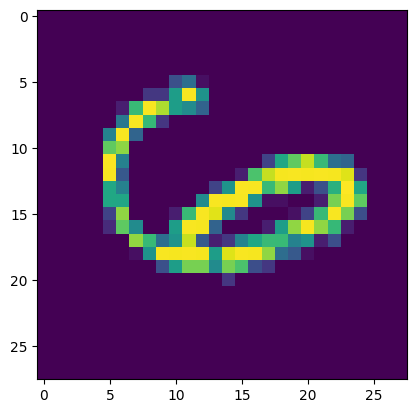

In [14]:
n=random.randint(0,9999)
plt.imshow(xtest[n])
plt.show()

In [15]:
predicted=model.predict(xtest)
import numpy as np
print("Target Value ",ytest[n])
print("Predicted Value ",np.argmax(predicted[n]))

313/313 [==============================] - 1s 4ms/step
Target Value  6
Predicted Value  6


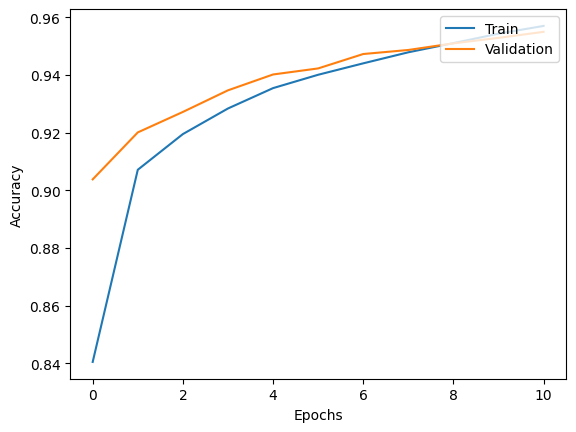

In [18]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()

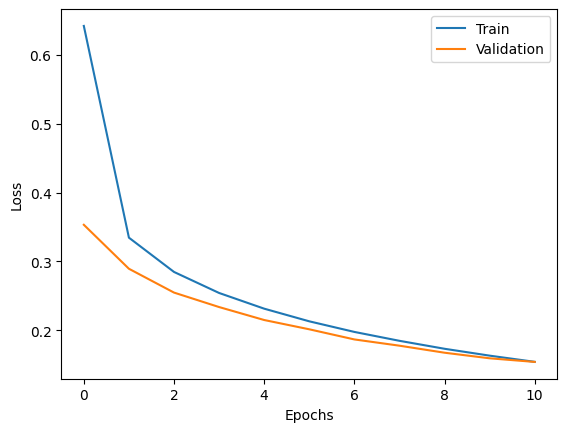

In [19]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Train","Validation"],loc="upper right")
plt.show()